Ref: http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

t-distributed Stochastic Neighbor Embedding.

t-SNE [1] is a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data. t-SNE has a cost function that is not convex, i.e. with different initializations we can get different results.

It is highly recommended to use another dimensionality reduction method (e.g. PCA for dense data or TruncatedSVD for sparse data) to reduce the number of dimensions to a reasonable amount (e.g. 50) if the number of features is very high. This will suppress some noise and speed up the computation of pairwise distances between samples. For more tips see Laurens van der Maaten’s FAQ [2].

In [1]:
import torch
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.manifold import TSNE

# Generate x1, x2, ..., x6 and their labels y1, y2, ..., y6

In [2]:
n_data = torch.ones(100, 1) # [1, 1, 1, ...,1]

In [3]:
x11 = torch.normal(-3*n_data, 2)
x12 = torch.normal(-3*n_data, 2)
x21 = torch.normal(3*n_data, 2)
x22 = torch.normal(3*n_data, 2)
x31 = torch.normal(0*n_data, 1)
x32 = torch.normal(0*n_data, 1)
x41 = torch.normal(-2*n_data, 1)
x42 = torch.normal(n_data, 1)
x51 = torch.normal(0*n_data, 1)
x52 = torch.normal(2*n_data, 1)
x61 = torch.normal(0*n_data, 1)
x62 = torch.normal(-2*n_data, 1)

In [4]:
x1=torch.cat((x11, x12), 1)
x2=torch.cat((x21, x22), 1)
x3=torch.cat((x31, x32), 1)
x4=torch.cat((x41, x42), 1)
x5=torch.cat((x51, x52), 1)
x6=torch.cat((x61, x62), 1)

In [5]:
x = torch.cat((x1, x2), 0)
x = torch.cat((x, x3), 0)
x = torch.cat((x, x4), 0)
x = torch.cat((x, x5), 0)
x = torch.cat((x, x6), 0).type(torch.FloatTensor)

In [6]:
y1 = torch.ones(100)
y2 = 2*y1
y3 = 3*y1
y4 = 4*y1
y5 = 5*y1
y6 = 6*y1

In [7]:
y = torch.cat((y1, y2), 0)
y = torch.cat((y, y3), 0)
y = torch.cat((y, y4), 0)
y = torch.cat((y, y5), 0)
y = torch.cat((y, y6), 0).type(torch.LongTensor)

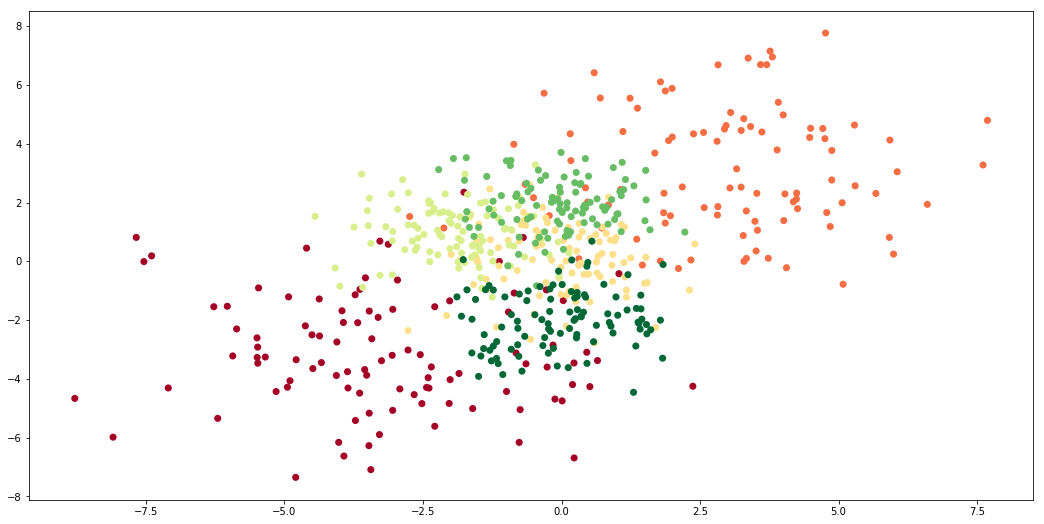

In [8]:
plt.figure(figsize=(18,9)) # set the figure size to 18 x 9 inches
plt.scatter(x.numpy()[:, 0], x.numpy()[:, 1], c=y.numpy(), s=50, lw=0, cmap='RdYlGn')
plt.show()

# Apply TSEN to find clusters

In [9]:
tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=500)

In [10]:
x1 = tsne.fit_transform(x.numpy(), y)

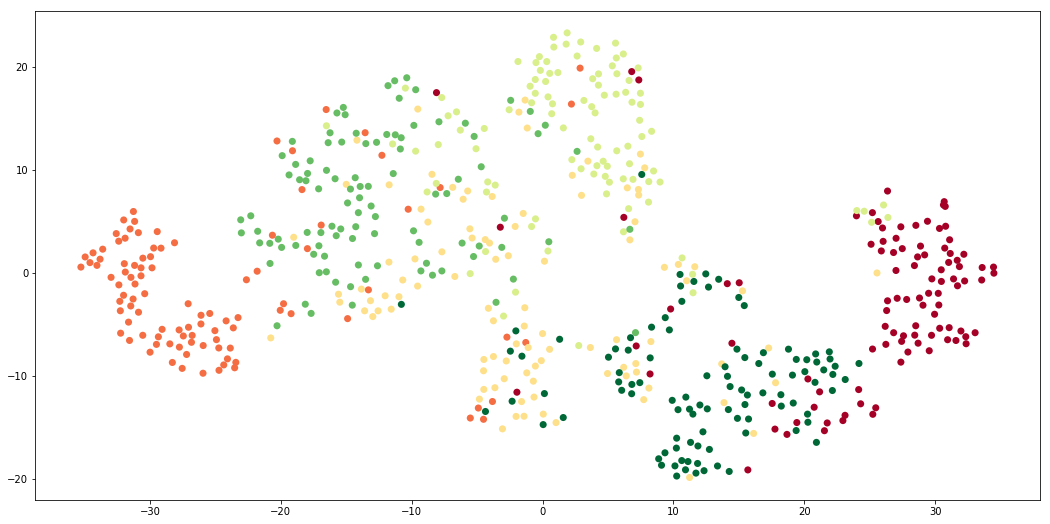

In [11]:
plt.figure(figsize=(18,9)) 
plt.scatter(x1[:, 0], x1[:, 1], s=50, c=y.numpy(), lw=0, cmap='RdYlGn')
plt.show()

# Try different parameters...

###  Ieration is fixed at 5000

###  1. perplexity   

Try perplexity = 2,  5,  30,  50,  100,  

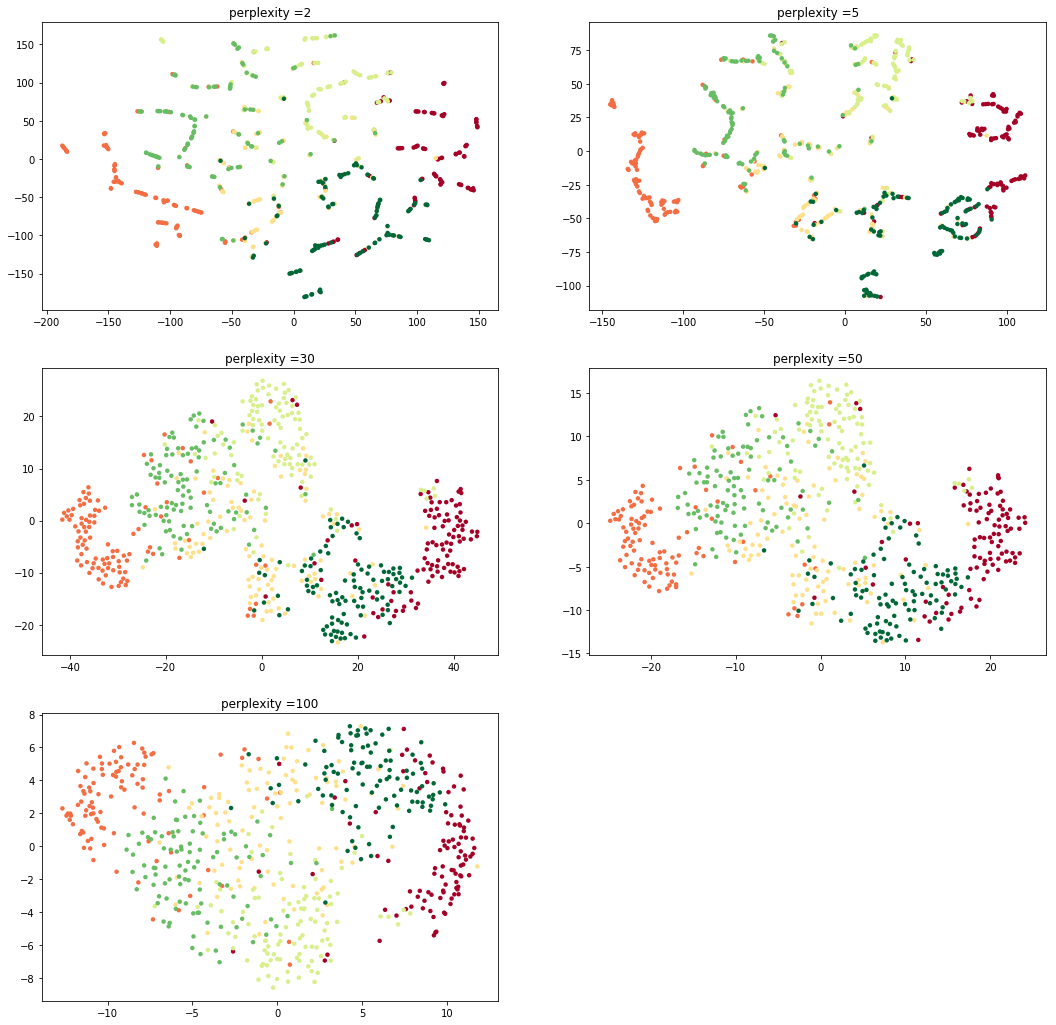

In [12]:
i = 1
fig = plt.figure(figsize=(18, 18)) # 18x9 inches to fit 3 rows * 2 columns subplots
lst = [2, 5, 30, 50, 100]
print('Try perplexity = ', end = '')
for n in lst:
    print(n, end = ',  ')
    tsne = TSNE(perplexity=n, n_components=2, init='pca', n_iter=5000)
    x1 = tsne.fit_transform(x.numpy(), y)
    a=fig.add_subplot(3,2, i) # we have a 3 rows * 2 columns subplots
    plt.scatter(x1[:, 0], x1[:, 1], s=20, c=y.numpy(), lw=0, cmap='RdYlGn')
    title = 'perplexity =' + str(n)
    plt.title(title)
    i=i+1
plt.show()

###  2. try Initialization of embedding =  ‘random’ or ‘pca’, 

Try perplexity = 2 pca ,random ,5 pca ,random ,30 pca ,random ,50 pca ,random ,100 pca ,random ,

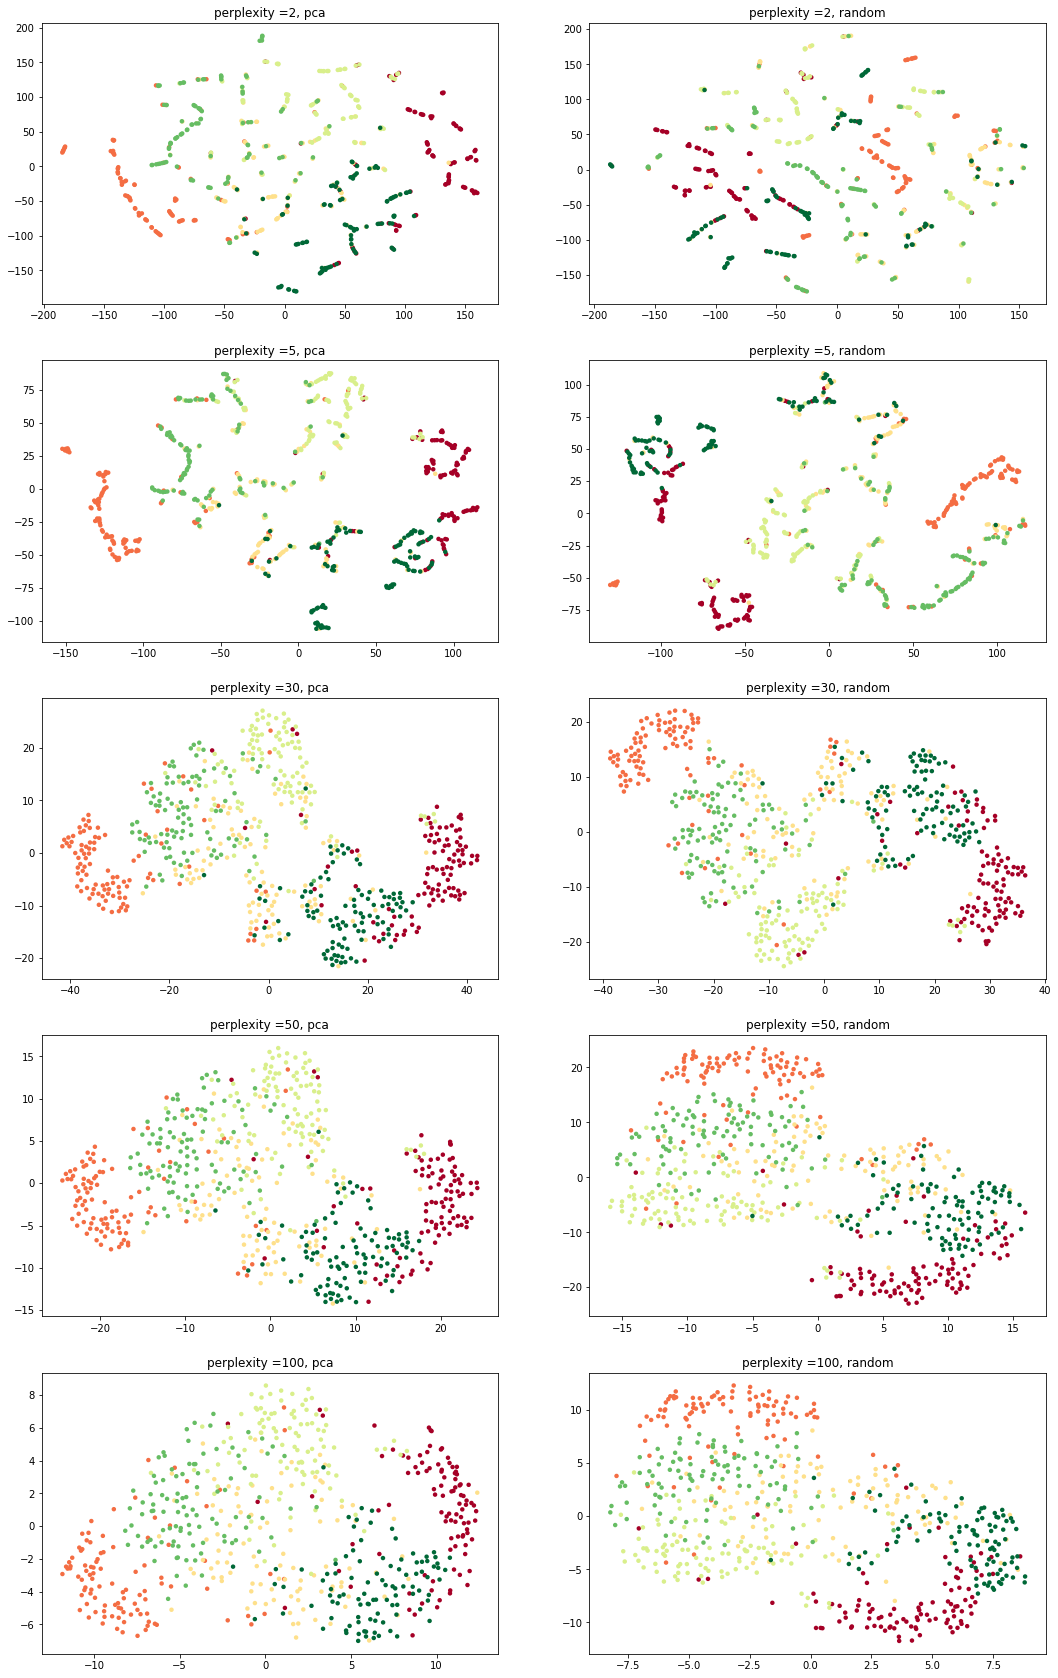

In [13]:
i = 1
fig = plt.figure(figsize=(18, 30)) # 18x30 inches to fit 5 rows * 2 columns subplots
lst1 = [2, 5, 30, 50, 100]
lst2 = ['pca', 'random']
print('Try perplexity = ', end = '')
for n in lst1:
    print(n, end = ' ')
    for init_method in lst2:
        print(init_method, end = ' ,')
        tsne = TSNE(perplexity=n, n_components=2, init=init_method, n_iter=5000)
        x1 = tsne.fit_transform(x.numpy(), y)
        a=fig.add_subplot(5, 2, i) # we have a 5 rows * 2 columns subplots
        plt.scatter(x1[:, 0], x1[:, 1], s=20, c=y.numpy(), lw=0, cmap='RdYlGn')
        title = 'perplexity =' + str(n) + ', ' + init_method
        plt.title(title)
        i=i+1
plt.show()

### Please read https://distill.pub/2016/misread-tsne/  to see how to adjust parameters for different types of input data